# **Deep Learning Preprocessing + Models**
In this notebook I will first go through a couple of preprocessing steps needed for our dataset to be pushed through a neural network. After the preprocessing is complete we will begin building neural networks. 

In [1]:
import pandas as pd
import keras
import numpy as np 
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['clean_tweets_dl.csv']))

Saving clean_tweets_dl.csv to clean_tweets_dl.csv


In [2]:
df.head()


,text,sentiment,clean_tweets
0,"i`d have responded, if i were going",neutral,id have responded if i were going
1,sooo sad i will miss you here in san diego!!!,negative,sooo sad i will miss you here in san diego
2,my boss is bullying me...,negative,my boss is bullying me
3,what interview! leave me alone,negative,what interview leave me alone
4,"sons of ****, why couldn`t they put them on t...",negative,sons of why couldnt they put them on the rele...


In [3]:
df_tweets = df.drop(columns=['text'])
df_tweets['clean_tweets'] = df_tweets['clean_tweets'].astype('str')

In [4]:
df_tweets.isnull().sum()

sentiment       0
clean_tweets    0
dtype: int64

In [5]:
df_tweets.tail()

,sentiment,clean_tweets
24457,negative,wish whatever could come see you on denver hus...
24458,negative,ive wondered about rake to the client has made...
24459,positive,yay good for both of you enjoy the break you ...
24460,positive,but it was worth it
24461,neutral,all this flirting going on the atg smiles yay...


## **Model Selection**
Defining X and y and splitting our data.

In [6]:
X = df_tweets['clean_tweets']

In [7]:
X[4]

'sons of  why couldnt they put them on the releases whatever already bought'

In [8]:
## encoding target variable 

from keras.utils import to_categorical
from keras.preprocessing.text import one_hot
      
def encode_target(targets):
  if targets == 'positive':
    return 0
  elif targets == 'negative':
    return 1
  else:
    return 2

df_tweets['target'] = df_tweets['sentiment'].apply(encode_target)

y = to_categorical(df_tweets['target'], num_classes=3)
y

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(17123,) (17123, 3)
(7339,) (7339, 3)


# **Creating Custom Embedding Layer**
In deep learning text data must first be transformed by an embedding layer. An embedding layer essentially converts our text data to numeric, specifically a vector.

In [10]:
## finding number of unique words in corpus 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

all_words = []
for sent in df_tweets['clean_tweets']:
    tokenize_word = word_tokenize(sent)
    for word in tokenize_word:
        all_words.append(word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
 vocab_size = set(all_words)
print(len(vocab_size))

25122


### **Tokenizing Corpus**
The Tokenizer object in Keras will create a word-to-index dictionary, which maps each word to a special number

In [12]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words= 25122)

tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
word_index = tokenizer.word_index

print(vocab_size, word_index)

19683 {'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'you': 6, 'it': 7, 'and': 8, 'in': 9, 'is': 10, 'for': 11, 'of': 12, 'im': 13, 'not': 14, 'have': 15, 'on': 16, 'me': 17, 'that': 18, 'so': 19, 'just': 20, 'but': 21, 'with': 22, 'out': 23, 'its': 24, 'day': 25, 'be': 26, 'are': 27, 'at': 28, 'was': 29, 'too': 30, 'good': 31, 'all': 32, 'this': 33, 'now': 34, 'up': 35, 'get': 36, 'like': 37, 'love': 38, 'online': 39, 'means': 40, 'dont': 41, 'go': 42, 'your': 43, 'today': 44, 'do': 45, 'work': 46, 'going': 47, 'cant': 48, 'got': 49, 'happy': 50, 'know': 51, 'from': 52, 'one': 53, 'am': 54, 'what': 55, 'really': 56, 'back': 57, 'whatever': 58, 'there': 59, 'laughing': 60, 'about': 61, 'will': 62, 'had': 63, 'see': 64, 'eyes': 65, 'night': 66, 'two': 67, 'can': 68, 'oh': 69, 'some': 70, 'mothers': 71, 'tears': 72, 'if': 73, 'well': 74, 'off': 75, 'think': 76, 'thanks': 77, 'as': 78, 'new': 79, 'still': 80, 'loud': 81, 'when': 82, 'want': 83, 'more': 84, 'much': 85, 'home': 86, 'they': 87

In [13]:
X_train

[[150, 6, 7391, 290, 6, 7392, 666, 2, 3150],
 [7393, 107, 19, 1169, 1170],
 [103, 50, 3151],
 [7394,
  17,
  30,
  1,
  54,
  19,
  19,
  7395,
  141,
  1,
  2398,
  1,
  170,
  36,
  4,
  7396,
  626,
  113],
 [121, 164, 454, 2, 6],
 [1171,
  384,
  555,
  6,
  445,
  16,
  476,
  97,
  680,
  4,
  3826,
  345,
  23,
  33,
  160,
  746,
  1065],
 [5000, 174, 8, 7397, 117, 64, 289, 9, 3, 2139],
 [77,
  2,
  32,
  3,
  148,
  171,
  1776,
  17,
  16,
  2399,
  73,
  6,
  83,
  2,
  681,
  17,
  5,
  501,
  10,
  220,
  78,
  5,
  117,
  501,
  8,
  5,
  3152,
  501,
  8,
  3827,
  934],
 [8,
  115,
  18,
  3828,
  37,
  4,
  230,
  207,
  1367,
  20,
  512,
  7398,
  3829,
  229,
  7399,
  1439,
  20,
  208,
  151,
  2729],
 [1, 423, 2, 332, 5, 46, 875, 9, 3, 2730, 210, 1, 38, 5, 79, 5001],
 [234, 358, 648, 11, 101, 177],
 [446, 1777, 8, 419, 7, 23, 16, 3, 508, 1, 38, 1, 38, 6, 2731],
 [5,
  240,
  226,
  2,
  79,
  1532,
  305,
  17,
  8,
  32,
  1,
  49,
  29,
  33,
  566,
  12,
  101

## **Padding** 
Padding is simply creating the same size sentences by either adding zeros to the beginning of a sentence or after to meet the set maximum length.

In [14]:
# finding largest sentence in tweets for padding 
# sentences need to have equal size for embedding layer

from keras.preprocessing.sequence import pad_sequences

max_length = max([len(s.split()) for s in df_tweets['clean_tweets']])
X_train = pad_sequences(X_train, padding='post', maxlen=max_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_length)

print(X_train)

[[  150     6  7391 ...     0     0     0]
 [ 7393   107    19 ...     0     0     0]
 [  103    50  3151 ...     0     0     0]
 ...
 [   44  1013  2300 ...     0     0     0]
 [   33    29     3 ...     0     0     0]
 [    3 19679    94 ...     0     0     0]]


In [15]:
print(max_length)

49


## **Baseline Model**

In [16]:
from keras.models import Sequential
from keras.layers.core import Dropout, Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.layers import GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_length))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.7))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

# early_stopping_moniter = EarlyStopping(patience=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 49, 32)            629856    
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                660       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
Total params: 630,579
Trainable params: 630,579
Non-trainable params: 0
__________________________________________________

In [17]:
history = model.fit(X_train, y_train, batch_size=128, epochs=25, validation_split=.3, verbose=1)
score = model.evaluate(X_test, y_test, verbose=1)
print('test loss:',score[0],
      'test accuracy:', score[1])

Epoch 1/25
94/94 [==============================] - 1s 11ms/step - loss: 1.1022 - acc: 0.3434 - val_loss: 1.0943 - val_acc: 0.3590
Epoch 2/25
94/94 [==============================] - 1s 10ms/step - loss: 1.0962 - acc: 0.3547 - val_loss: 1.0882 - val_acc: 0.3778
Epoch 3/25
94/94 [==============================] - 1s 10ms/step - loss: 1.0839 - acc: 0.3752 - val_loss: 1.0627 - val_acc: 0.4837
Epoch 4/25
94/94 [==============================] - 1s 10ms/step - loss: 1.0604 - acc: 0.4259 - val_loss: 1.0209 - val_acc: 0.6194
Epoch 5/25
94/94 [==============================] - 1s 10ms/step - loss: 1.0253 - acc: 0.4646 - val_loss: 0.9625 - val_acc: 0.6346
Epoch 6/25
94/94 [==============================] - 1s 10ms/step - loss: 0.9892 - acc: 0.5056 - val_loss: 0.9120 - val_acc: 0.6473
Epoch 7/25
94/94 [==============================] - 1s 9ms/step - loss: 0.9530 - acc: 0.5472 - val_loss: 0.8686 - val_acc: 0.6652
Epoch 8/25
94/94 [==============================] - 1s 10ms/step - loss: 0.9310 - ac

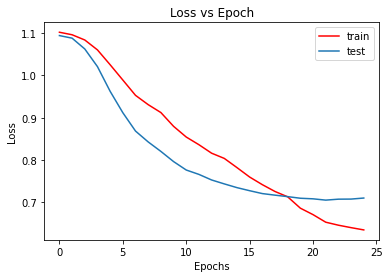

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend(['train', 'test'])
plt.show()



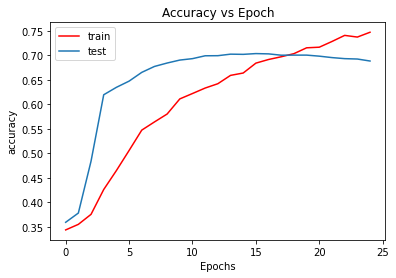

In [19]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Accuracy vs Epoch')
plt.legend(['train', 'test'])
plt.show()

In [20]:
# print("Test Score:", score[0])
# print("Test Accuracy:", score[1])
# print(y_test.shape)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict_classes(X_test)
df_test = pd.DataFrame({'true': y_test.tolist(), 'pred':y_pred.tolist()})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix\n",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
confusion matrix
 [[1918   95  622]
 [ 115 1394  755]
 [ 359  389 1692]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      2635
           1       0.74      0.62      0.67      2264
           2       0.55      0.69      0.61      2440

    accuracy                           0.68      7339
   macro avg       0.70      0.68      0.68      7339
weighted avg       0.70      0.68      0.69      7339



In [22]:
import re
def prepare_text(sample_text):
  '''This function will clean up a new string to be fed into a NN'''
  text = sample_text.lower()
  text=re.sub(r'https?://\S+|www\.\S+',"",text)
  text=re.sub(r'[^\s\w\s]', "", text)
  text=re.sub(r'[\d+]', "", text)
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(text)
  num_text = tokenizer.texts_to_sequences(text)
  num_text = pad_sequences(num_text, padding='post', maxlen=49)
  return num_text

In [23]:
sam_text = 'what a great and nice day'
sample_text = prepare_text(sam_text)
prediction = model.predict(np.array(sample_text))
print(np.argmax(prediction[0]))

2


## **Convolutional Neural Network Model**

In [24]:

import math
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import GlobalMaxPooling1D, Conv1D
from keras.regularizers import l2

opt = keras.optimizers.Adam(learning_rate=0.04)

model2 = Sequential()
model2.add(Embedding(vocab_size, 32, input_length=max_length))
model2.add(Dropout(0.50))
model2.add(Conv1D(32, 3, activation='relu'))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(20, activation='relu'))
model2.add(Dropout(0.50))
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
print(model2.summary())

##callbacks
# early_stopping_moniter = EarlyStopping(patience=2)

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.6, epoch)

# lr schedule callback
lr_decay_callback = keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 49, 32)            629856    
_________________________________________________________________
dropout_2 (Dropout)          (None, 49, 32)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 47, 32)            3104      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                660       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [25]:
history2 = model2.fit(X_train, y_train, batch_size= 132, epochs=20, validation_split=.2, verbose=1, callbacks=[lr_decay_callback, ReduceLROnPlateau()])
score2 = model2.evaluate(X_test, y_test, verbose=1)
print('test loss:',score2[0],
      'test accuracy:', score2[1])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 1/20
104/104 [==============================] - 1s 12ms/step - loss: 1.0107 - acc: 0.4717 - val_loss: 0.8160 - val_acc: 0.6263

Epoch 00002: LearningRateScheduler reducing learning rate to 0.006.
Epoch 2/20
104/104 [==============================] - 1s 10ms/step - loss: 0.8321 - acc: 0.6157 - val_loss: 0.7205 - val_acc: 0.6952

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0036.
Epoch 3/20
104/104 [==============================] - 1s 10ms/step - loss: 0.7292 - acc: 0.6796 - val_loss: 0.6911 - val_acc: 0.7112

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0021599999999999996.
Epoch 4/20
104/104 [==============================] - 1s 10ms/step - loss: 0.6561 - acc: 0.7262 - val_loss: 0.6827 - val_acc: 0.7107

Epoch 00005: LearningRateScheduler reducing learning rate to 0.001296.
Epoch 5/20
104/104 [==============================] - 1s 10ms/step - loss: 0.6170 - acc: 0.7430 - val_lo

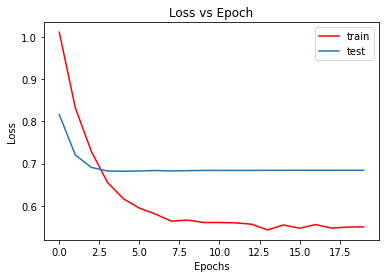

In [26]:
plt.plot(history2.history['loss'],'r')
plt.plot(history2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend(['train', 'test'])
plt.show()


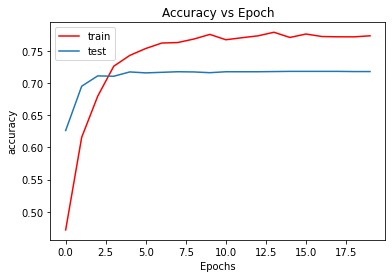

In [27]:
plt.plot(history2.history['acc'],'r')
plt.plot(history2.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Accuracy vs Epoch')
plt.legend(['train', 'test'])
plt.show()

In [28]:
y_pred = model2.predict_classes(X_test)
df_test = pd.DataFrame({'true': y_test.tolist(), 'pred':y_pred.tolist()})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix\n",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix
 [[1914  111  610]
 [  93 1499  672]
 [ 326  388 1726]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      2635
           1       0.75      0.66      0.70      2264
           2       0.57      0.71      0.63      2440

    accuracy                           0.70      7339
   macro avg       0.71      0.70      0.70      7339
weighted avg       0.72      0.70      0.70      7339



In [29]:
string = 'In a good mood today... found $5 walking up the steps'
sample_text = prepare_text(string)
prediction = model2.predict(np.array(sample_text))
print(np.argmax(prediction[0]))

2


## **Recurrent Neural Network(LSTM) Model**

In [30]:
from keras.layers import LSTM
opt = keras.optimizers.Adam(learning_rate=0.005)

model_3 = Sequential()
model_3.add(Embedding(vocab_size, 32, input_length=max_length))
model_3.add(LSTM(units=32))
model_3.add(Dropout(0.35))
model_3.add(Dense(3, activation='softmax'))

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model_3.summary())

# early_stopping_moniter = EarlyStopping(patience=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 49, 32)            629856    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 638,275
Trainable params: 638,275
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
history3 = model_3.fit(X_train, y_train, batch_size=132, epochs=10, validation_split=.2, verbose=1)
score3 = model_3.evaluate(X_test, y_test, verbose=1)
y_pred = model_3.predict(X_test)
print('test loss:',score3[0],
      'test accuracy:', score3[1])

Epoch 1/10
104/104 [==============================] - 2s 19ms/step - loss: 1.0985 - acc: 0.3463 - val_loss: 1.0977 - val_acc: 0.3355
Epoch 2/10
104/104 [==============================] - 1s 14ms/step - loss: 1.0987 - acc: 0.3414 - val_loss: 1.0984 - val_acc: 0.3364
Epoch 3/10
104/104 [==============================] - 1s 14ms/step - loss: 1.0986 - acc: 0.3409 - val_loss: 1.0975 - val_acc: 0.3547
Epoch 4/10
104/104 [==============================] - 1s 14ms/step - loss: 1.0695 - acc: 0.3863 - val_loss: 0.8996 - val_acc: 0.5524
Epoch 5/10
104/104 [==============================] - 1s 14ms/step - loss: 0.7959 - acc: 0.6333 - val_loss: 0.7613 - val_acc: 0.6666
Epoch 6/10
104/104 [==============================] - 1s 14ms/step - loss: 0.5952 - acc: 0.7635 - val_loss: 0.7424 - val_acc: 0.6747
Epoch 7/10
104/104 [==============================] - 1s 14ms/step - loss: 0.4663 - acc: 0.8333 - val_loss: 0.7842 - val_acc: 0.6826
Epoch 8/10
104/104 [==============================] - 1s 14ms/step - 

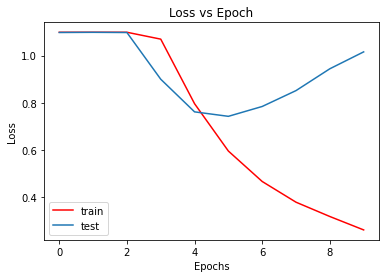

In [32]:
plt.plot(history3.history['loss'],'r')
plt.plot(history3.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend(['train', 'test'])
plt.show()

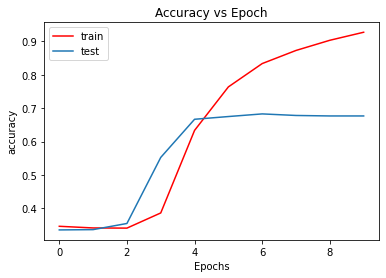

In [33]:
plt.plot(history3.history['acc'],'r')
plt.plot(history3.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Accuracy vs Epoch')
plt.legend(['train', 'test'])
plt.show()

In [34]:
y_pred = model_3.predict_classes(X_test)
df_test = pd.DataFrame({'true': y_test.tolist(), 'pred':y_pred.tolist()})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix\n",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix
 [[1976   89  570]
 [ 194 1300  770]
 [ 566  384 1490]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      2635
           1       0.73      0.57      0.64      2264
           2       0.53      0.61      0.57      2440

    accuracy                           0.65      7339
   macro avg       0.66      0.64      0.65      7339
weighted avg       0.66      0.65      0.65      7339



# **Model Selection Summary** 

## **Best Model** 

The best performing neural network was the convolutional neural network. This network achieved an accuracy of .70 with an F1 score of .70. This model was prone to overfitting so I had to set a couple regularization parameters, such as addition of dropout layers and a learning rate scheduler. This model used an ‘adam’ optimizer with a learning rate set to 0.04. We also used a one dimensional convolutional layer with 32 neurons. After looking at the confusion matrix, this model also tends to struggle with predicting a ‘neutral’ sentiment. 